Implementing Naive Bayes (classification) ML Algorithm on Iris dataset
---
Naive Bayes is a probabilistic classifier based on Bayes' Theorem with a "naive" assumption: all features are independent given the class label.

It’s especially useful for classification tasks and works surprisingly well even when the independence assumption is violated.

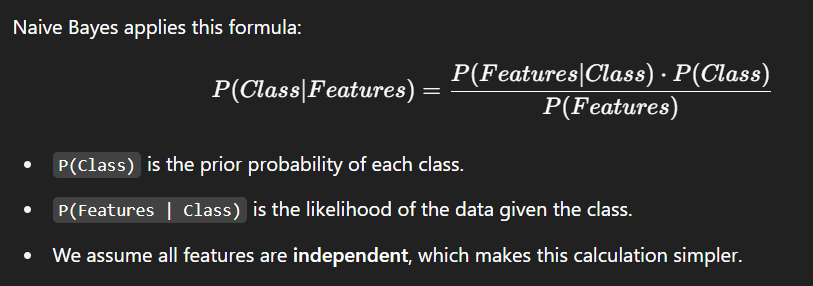

In [25]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
#load dataset
iris_df= pd.read_csv("Iris.csv")
iris_df=iris_df.drop(columns="Id") #coz ID column is irrelevant
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#features and target
X=iris_df.drop(columns="Species") #features
y=iris_df["Species"] #target

In [14]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#train naive bayes
nb_model=GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [21]:
#predict
y_pred=nb_model.predict(X_test)

In [23]:
#evaluate
accuracy=accuracy_score(y_test, y_pred)
conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



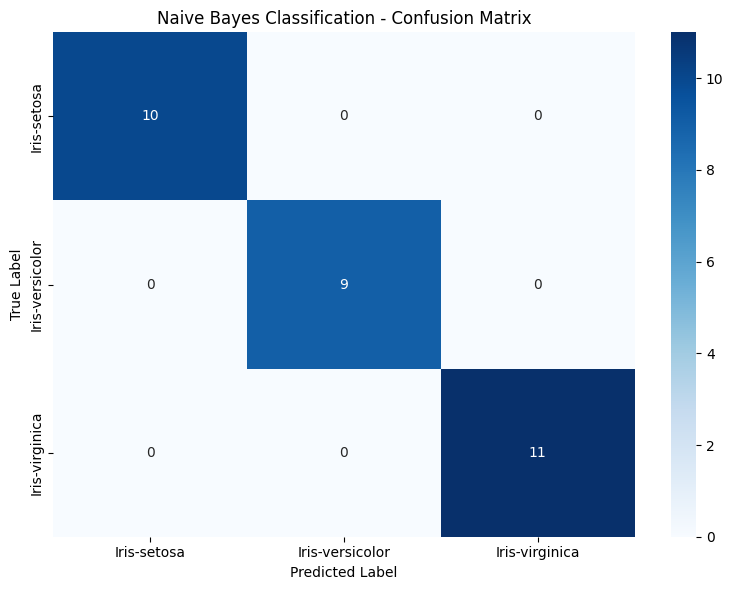

In [30]:
#confusion matrix
plt.figure(figsize=(8, 6))
species = iris_df['Species'].unique()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=species, yticklabels=species)
plt.title("Naive Bayes Classification - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()